# Statistisk inferens: Konjugert prior

Vi kan ikke trekke ut noen funksjon for konjugert prior for beta, normalfordeling osv. fra de Python-pakkene vi har brukt. Likevel er det ikke så mye kode som skal til. Funksjonen under, gir en ny normalfordeling hvis standardavviket er kjent, og en student's t hvis ikke. Dette er rett og slett en oversettelse av fremgangsmåten fra boka, til Python.

In [1]:
from scipy.stats import norm


def norm_konjugert_posterior(mu0, sigma0, observasjoner, stdav=None):
    prior = norm(mu0, sigma0)
    n = len(observasjoner)
    gjsnitt = sum(observasjoner)/n

    d0 = 1/sigma0**2
    d_data = n/stdav**2


    d1 = d0+d_data
    sigma1 = 1/d1**0.5
    mu1 = d0/d1*mu0 + d_data/d1*gjsnitt

    if stdav == None:
        return t(mu1, n-1, sigma1)
    else:
        return norm(mu1, sigma1) # Ny posterior

### Eksempel

Du jobber på en kokosnøttplantasje og høster kokosnøtter, og ønsker å gjøre litt statistikk. Du mener å ha sett at en vekten til kokosnøtter er normalfordelt med $\sigma=0.4$ (kg). I dag var de første nøttene du plukket på hhv. 1.35, 1.56, 1.44 og 1.61 kg. Du bruker en prior $N_{(1.5, 0.15)}$.

Hva blir posterior?

Vi bruker funksjonen vi lagde over, og fyller inn parameterne fra oppgaven. Deretter plotter vi prior og posterior.

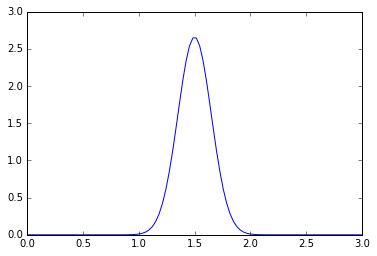

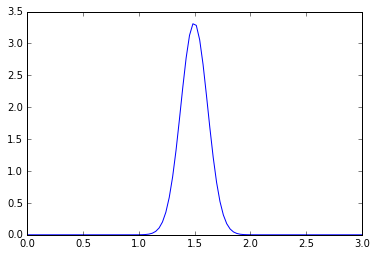

In [2]:
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

posterior = norm_konjugert_posterior(
    mu0=1.5, sigma0=0.15, observasjoner=[1.35, 1.56, 1.44, 1.61], stdav=0.4
) # Parameternavn tatt med for klarhetens skyld. Siste parameter er frivillig.


indekser = np.linspace(0, 3, 100)

prior = norm(1.5, 0.15)
prior_fordeling = prior.pdf(indekser)
post_fordeling = posterior.pdf(indekser)


df = DataFrame(prior_fordeling, indekser)
df.plot.line(legend=None)
plt.show()

df2 = DataFrame(post_fordeling, indekser)
df2.plot.line(legend=None)
plt.show()

Og hva er sannsynligheten for at forventet vekt på en kokosnøtt er mindre enn 1.41 kg?

In [3]:
posterior.cdf(1.41)

0.23576249777925101